In [1]:
import sklearn

In [2]:
from sklearn.datasets import fetch_california_housing

In [19]:
X = fetch_california_housing(as_frame=True).data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
y = fetch_california_housing(as_frame=True).target
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [23]:
X.shape, y.shape

((20640, 8), (20640,))

# Data preprocessing + EDA

## Check missing-value 

In [27]:
X.info()
X[X.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude


## Check dtype=objcet in column
* To Check categorical feature

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

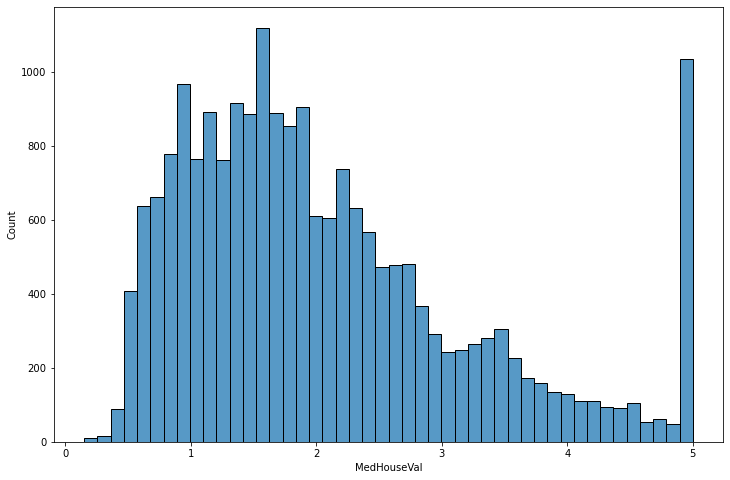

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(y)
plt.show()

# Train-Test split

In [52]:
from sklearn.model_selection import train_test_split

In [66]:
# 암기하면 좋다
# 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


# Training(Fit)

## 1. Call function to use

In [83]:
from sklearn.linear_model import LinearRegression

## 2. Generate object of function to use

In [70]:
reg = LinearRegression()
reg

LinearRegression()

## 3. Training

In [71]:
reg.fit(X_train, y_train) # Regression: supervised learning

LinearRegression()

# Evaluation

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
prediction = reg.predict(X_train) # y_hat
prediction

array([2.31487772, 2.43630546, 2.32717456, ..., 2.29635505, 2.54996955,
       1.70367783])

In [79]:
print('MSE: %.4f' % mean_squared_error(y_train, prediction))
print('R2SCORE: %.4f' % r2_score(y_train, prediction))

MSE: 0.5309
R2SCORE: 0.6018


# Prediction

In [100]:
result = reg.predict(X_test)

In [101]:
print('MSE: %.4f' % mean_squared_error(y_test, result))
print('R2SCORE: %.4f' % r2_score(y_test, result))

MSE: 0.5005
R2SCORE: 0.6224


# Do this with LightGBM

## Training(Fit)

In [2]:
from lightgbm import LGBMRegressor
# from sklearn.lightgbm.sklearn import LGBMRegressor

In [90]:
reg_gbm = LGBMRegressor()
reg_gbm

LGBMRegressor()

In [91]:
reg_gbm.fit(X_train, y_train)

LGBMRegressor()

## Evaluation

In [92]:
prediction_gbm = reg_gbm.predict(X_train)
prediction_gbm

array([3.00937962, 2.45650129, 1.76647078, ..., 1.56624214, 2.46893101,
       2.17307956])

In [93]:
print('MSE: %.4f' % mean_squared_error(y_train, prediction_gbm))
print('R2SCORE: %.4f' % r2_score(y_train, prediction_gbm))

MSE: 0.1570
R2SCORE: 0.8822


## Prediction

In [99]:
result_gbm = reg_gbm.predict(X_test)
result_gbm

array([2.10950058, 2.23718708, 1.94974934, ..., 4.19129141, 2.07293999,
       1.30816228])

In [98]:
print('MSE: %.4f' % mean_squared_error(y_test, result_gbm))
print('R2SCORE: %.4f' % r2_score(y_test, result_gbm))

MSE: 0.2106
R2SCORE: 0.8411
